# Task - VI
### Author: **Allen Ben Philipose**

## Install Libraries

In [1]:
pip install six

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


## Import Libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly_express as px
import matplotlib.pyplot as plt
import category_encoders as ce
import sklearn.datasets as datasets

In [5]:
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix
from sklearn.metrics import classification_report, f1_score 
from sklearn import preprocessing
from six import StringIO  

In [6]:
from sklearn.neighbors import DistanceMetric
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score

In [7]:
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image  
import pydotplus

In [8]:
import warnings
warnings.filterwarnings('ignore')

## Dataset

In [9]:
allen = pd.read_csv("Dataset.csv")

In [10]:
allen.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
allen.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [12]:
allen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


## Exploratory Data Analysis

In [13]:
allen_corr = allen.corr()

In [14]:
allen_corr.style.background_gradient(cmap='coolwarm', axis=None)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


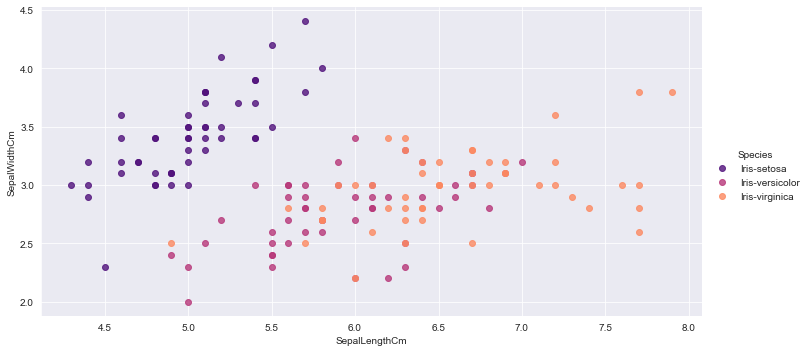

In [15]:
sns.set_style('darkgrid')
sns.lmplot('SepalLengthCm', 'SepalWidthCm', data=allen, hue='Species',
           palette='magma', size=5, aspect=2, fit_reg=False)

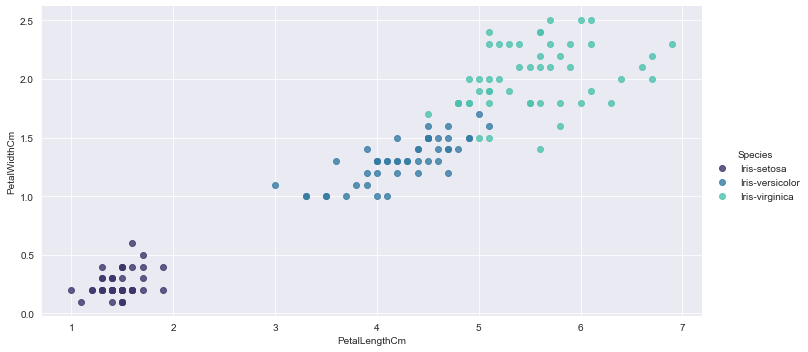

In [16]:
sns.set_style('darkgrid')
sns.lmplot('PetalLengthCm', 'PetalWidthCm', data=allen, hue='Species',
           palette='mako', size=5, aspect=2, fit_reg=False)

## Decision Tree

In [17]:
allen2=datasets.load_iris()

In [18]:
y=allen2.target
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [19]:
model=DecisionTreeClassifier()
model.fit(allen.drop(['Species'],axis=1),y)

DecisionTreeClassifier()

## Output

In [92]:
dd = StringIO()
export_graphviz(model, out_file=dd, feature_names=allen2.feature_names,  
                filled=True, rounded=True, special_characters=True)
output_graph = pydotplus.graph_from_dot_data(dd.getvalue())  
Image(output_graph.create_png())